In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [ ]:
df=pd.read_csv('StudentsPerformance0.csv')

In [ ]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
df.shape

(1000, 8)

In [ ]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      996 non-null    object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
df.isnull().sum()


,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,4
math score,0
reading score,0
writing score,0


In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)


/tmp/ipython-input-2189414140.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-2189414140.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
df.drop_duplicates(inplace=True)


In [ ]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns


Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

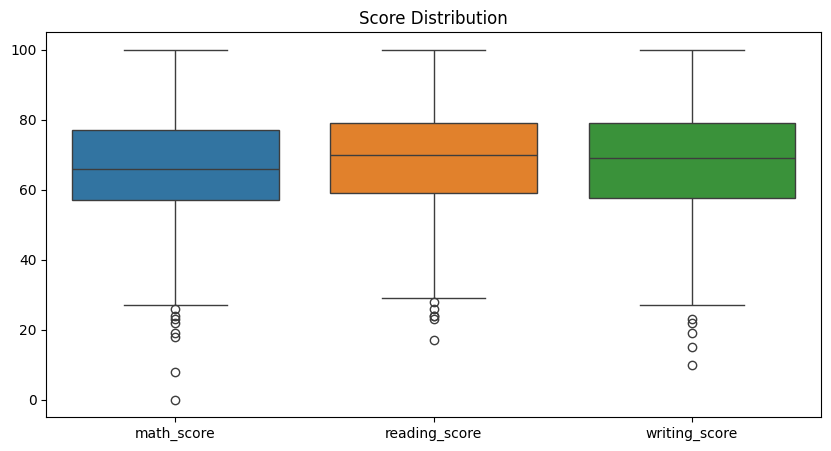

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['math_score', 'reading_score', 'writing_score']])
plt.title("Score Distribution")
plt.show()


In [ ]:
score_cols = ['math_score', 'reading_score', 'writing_score']

for col in score_cols:
    df[col] = df[col].clip(0, 100)


In [ ]:
df['gender'] = df['gender'].str.lower().str.strip()
df['parental_level_of_education'] = df['parental_level_of_education'].str.lower()


In [ ]:
df['average_score'] = df[score_cols].mean(axis=1)
df.head()


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   average_score                1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [ ]:
df.head()


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [ ]:
df.to_csv("cleaned_StudentsPerformance_Cleaned.csv", index=False)


In [ ]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    print(col, ":", df[col].nunique())


gender : 2
race/ethnicity : 5
parental_level_of_education : 6
lunch : 2
test_preparation_course : 2


In [ ]:
for col in cat_cols:
    print(df[col].value_counts(), "\n")


gender
female    518
male      482
Name: count, dtype: int64 

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64 

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64 

lunch
standard        645
free/reduced    355
Name: count, dtype: int64 

test_preparation_course
none         642
completed    358
Name: count, dtype: int64 



In [ ]:
z_scores = np.abs(stats.zscore(df[['math_score','reading_score','writing_score']]))
z_scores


array([[0.39002351, 0.19399858, 0.39149181],
       [0.19207553, 1.42747598, 1.31326868],
       [1.57771141, 1.77010859, 1.64247471],
       ...,
       [0.46775108, 0.12547206, 0.20107904],
       [0.12609287, 0.60515772, 0.58901542],
       [0.71993682, 1.15336989, 1.18158627]])

In [ ]:
outliers = (z_scores > 3).any(axis=1)
df[outliers]


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score
17,female,group B,some high school,free/reduced,none,18,32,28,26.000000
59,female,group C,some high school,free/reduced,none,0,17,10,9.000000
76,male,group E,some high school,standard,none,30,26,22,26.000000
327,male,group A,some college,free/reduced,none,28,23,19,23.333333
596,male,group B,high school,free/reduced,none,30,24,15,23.000000
787,female,group B,some college,standard,none,19,38,32,29.666667
980,female,group B,high school,free/reduced,none,8,24,23,18.333333


In [ ]:
df = df[~outliers]


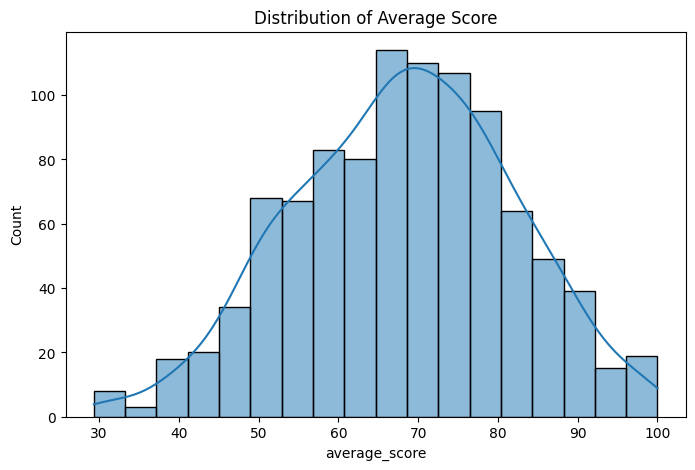

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['average_score'], kde=True)
plt.title("Distribution of Average Score")
plt.show()


In [ ]:
df['average_score'].skew()


np.float64(-0.13268023847155574)

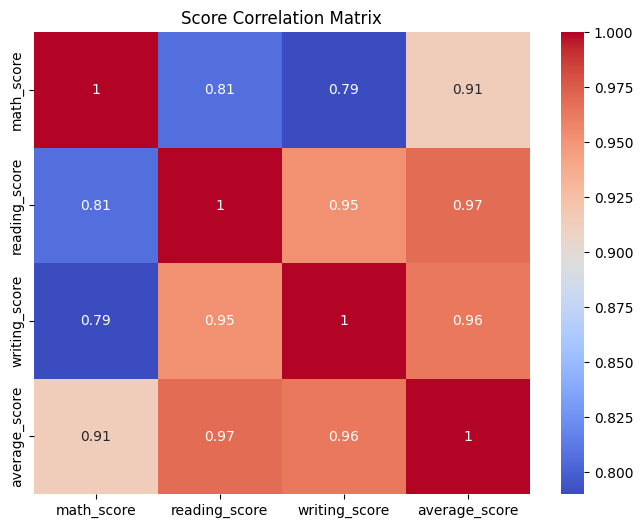

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['math_score','reading_score','writing_score','average_score']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Score Correlation Matrix")
plt.show()


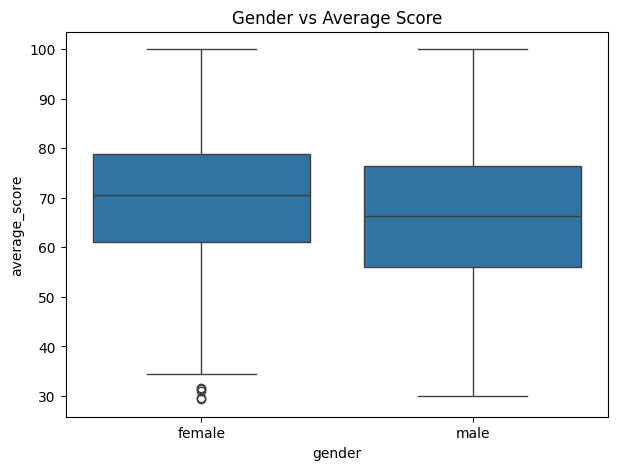

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x='gender', y='average_score', data=df)
plt.title("Gender vs Average Score")
plt.show()


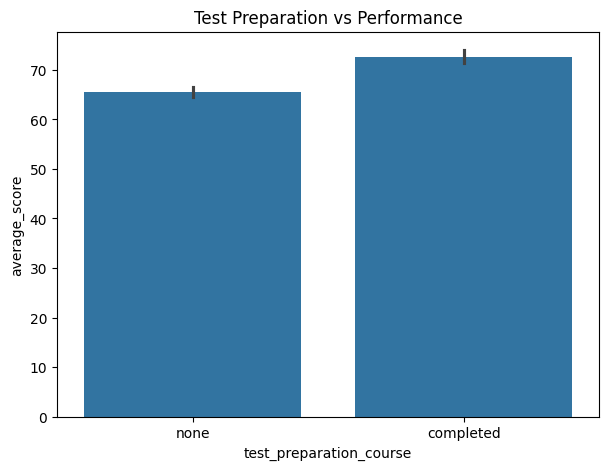

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(x='test_preparation_course', y='average_score', data=df)
plt.title("Test Preparation vs Performance")
plt.show()


In [ ]:
prep = df[df['test_preparation_course'] == 'completed']['average_score']
no_prep = df[df['test_preparation_course'] == 'none']['average_score']

stats.ttest_ind(prep, no_prep)


TtestResult(statistic=np.float64(8.11751600252612), pvalue=np.float64(1.4026458571224794e-15), df=np.float64(991.0))

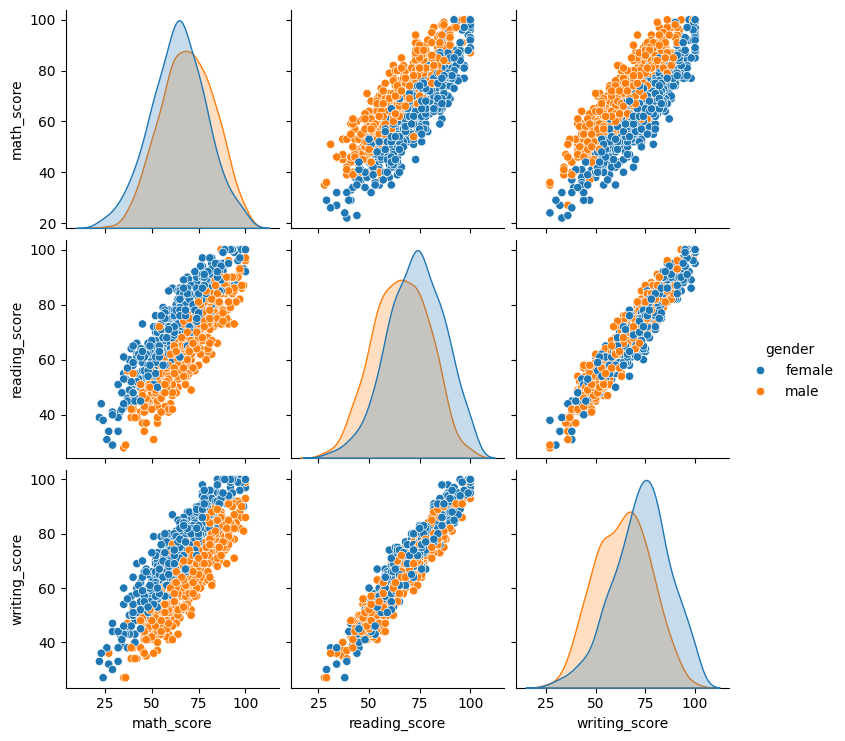

In [ ]:
sns.pairplot(df,
             vars=['math_score','reading_score','writing_score'],
             hue='gender')
plt.show()


In [ ]:
def performance_label(score):
    if score >= 80:
        return "High"
    elif score >= 60:
        return "Medium"
    else:
        return "Low"

df['performance_level'] = df['average_score'].apply(performance_label)


/tmp/ipython-input-2422638280.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['performance_level'] = df['average_score'].apply(performance_label)


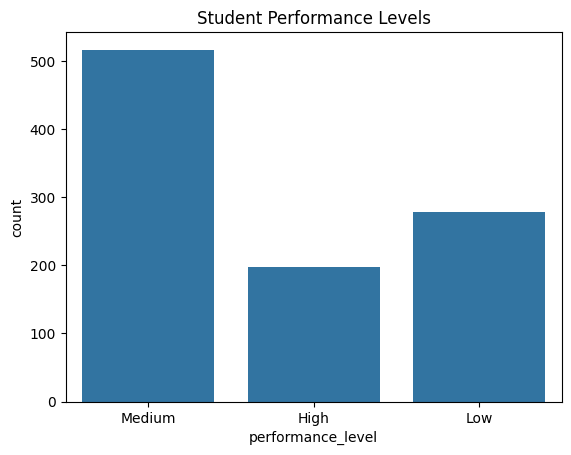

In [ ]:
sns.countplot(x='performance_level', data=df)
plt.title("Student Performance Levels")
plt.show()


In [ ]:
df.isnull().sum()


,0
gender,0
race/ethnicity,0
parental_level_of_education,0
lunch,0
test_preparation_course,0
math_score,0
reading_score,0
writing_score,0
average_score,0
performance_level,0


In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
df.head()


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,performance_level
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Medium
1,female,group C,some college,standard,completed,69,90,88,82.333333,High
2,female,group B,master's degree,standard,none,90,95,93,92.666667,High
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,Low
4,male,group C,some college,standard,none,76,78,75,76.333333,Medium


In [ ]:
df.to_csv("advance_StudentsPerformance_Advanced_Analysis.csv", index=False)
